# ------------------ CFGDEGREE - AUTUMN 2022 ------------------

The project was worked on by Ingrid Ionita,  Hiu Ching (Clarissa) Lo, Michelle Obonyano and Ayomide Olarewaju.

# PART 2: DATA ANALYSIS

### 1: IMPORTING LIBRARIES

In [59]:
# Importing all the necessary libraries.

import pandas as pd 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from functools import reduce

In [60]:
DF = pd.read_csv('cleaned_data.csv')
DF

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_8625/3299647211.py:1: DtypeWarning: Columns (0,1,29) have mixed types. Specify dtype option on import or set low_memory=False.
  DF = pd.read_csv('cleaned_data.csv')


,accident_index,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,junction_location,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model
0,2021010287148,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,1,...,1,1,6,1,19,4,Small Engine cc,1,3,VOLKSWAGEN GOLF
1,2021010287149,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,3,...,8,1,6,1,32,6,Large Engine cc,2,11,AUDI Q7
2,2021010287149,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,3,...,1,1,6,1,21,5,Medium Engine cc,1,11,VAUXHALL ASTRA
3,2021010287149,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,3,...,8,1,6,1,32,6,Large Engine cc,2,11,AUDI Q7
4,2021010287149,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,3,...,1,1,6,1,21,5,Medium Engine cc,1,11,VAUXHALL ASTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134209,202163DF01721,63DF01721,320842.0,311766.0,-3.172778,52.697776,63,1,3,3,...,0,2,3,1,37,7,Small Engine cc,0,-1,-1
134210,202163DF02122,63DF02122,307792.0,308034.0,-3.364790,52.662169,63,1,2,2,...,0,4,2,1,36,7,Medium Engine cc,2,13,VOLKSWAGEN GOLF
134211,202163DF02122,63DF02122,307792.0,308034.0,-3.364790,52.662169,63,1,2,2,...,0,1,6,1,28,6,Small Engine cc,0,-1,-1
134212,202163DF02122,63DF02122,307792.0,308034.0,-3.364790,52.662169,63,1,2,2,...,0,4,2,1,36,7,Medium Engine cc,2,13,VOLKSWAGEN GOLF


In [61]:
DF.describe()

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,...,vehicle_type,vehicle_manoeuvre,junction_location,first_point_of_impact,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,propulsion_code,age_of_vehicle
count,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,...,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000,134214.000000
mean,449791.086451,297516.698705,-1.271294,52.567528,22.145357,2.747441,2.189824,1.772110,4.150916,4.028969,...,10.177843,17.669178,2.591250,1.970927,4.603916,1.285656,39.953522,7.085610,1.235683,5.547961
std,78858.073719,111645.545984,1.151277,1.006839,18.482155,0.479280,0.876634,1.255021,1.954982,1.453804,...,11.341189,19.885419,3.246747,1.629886,1.975671,0.451728,16.008193,2.009927,1.464078,6.298126
min,175320.000000,70163.000000,-5.265939,50.530387,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,-1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,-1.000000
25%,396206.000000,187436.250000,-2.057731,51.572492,6.000000,3.000000,2.000000,1.000000,2.000000,3.000000,...,9.000000,9.000000,0.000000,1.000000,2.000000,1.000000,28.000000,6.000000,0.000000,-1.000000
50%,438139.000000,289637.000000,-1.426368,52.500446,20.000000,3.000000,2.000000,1.000000,4.000000,3.000000,...,9.000000,18.000000,1.000000,1.000000,6.000000,1.000000,36.000000,7.000000,1.000000,4.000000
75%,522350.500000,388675.000000,-0.224963,53.392685,34.000000,3.000000,2.000000,2.000000,6.000000,6.000000,...,9.000000,18.000000,6.000000,3.000000,6.000000,2.000000,51.000000,8.000000,2.000000,10.000000
max,655140.000000,654664.000000,1.755955,55.785269,63.000000,3.000000,11.000000,22.000000,7.000000,6.000000,...,99.000000,99.000000,9.000000,9.000000,6.000000,2.000000,101.000000,12.000000,12.000000,91.000000


In [62]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134214 entries, 0 to 134213
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   accident_index                134214 non-null  object 
 1   accident_reference_x          134214 non-null  object 
 2   location_easting_osgr         134214 non-null  float64
 3   location_northing_osgr        134214 non-null  float64
 4   longitude                     134214 non-null  float64
 5   latitude                      134214 non-null  float64
 6   police_force                  134214 non-null  int64  
 7   accident_severity             134214 non-null  int64  
 8   number_of_vehicles            134214 non-null  int64  
 9   number_of_casualties          134214 non-null  int64  
 10  date                          134214 non-null  object 
 11  day_of_week                   134214 non-null  int64  
 12  time                          134214 non-nul

### 2: FINDING CORRELATIONS

We created a new variable to use for our correlation analysis, because we need to drop a few irrelevant columns for this analysis.

In [63]:
DF_CORR = DF.drop(columns=['casualty_reference', 'vehicle_reference_y', 'vehicle_reference_x', 'age_band_of_driver', 'age_band_of_casualty', 'latitude', 'longitude', 'location_easting_osgr', 'location_northing_osgr'])

Once we have the columns that we need, we plotted a heatmap using seaborn to see what variables correlate to each other. The accident severity is a variable we are interested in, and it looks like casualty severity is strongly correlated to it.

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_8625/4176954888.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = DF_CORR.corr().round(2)


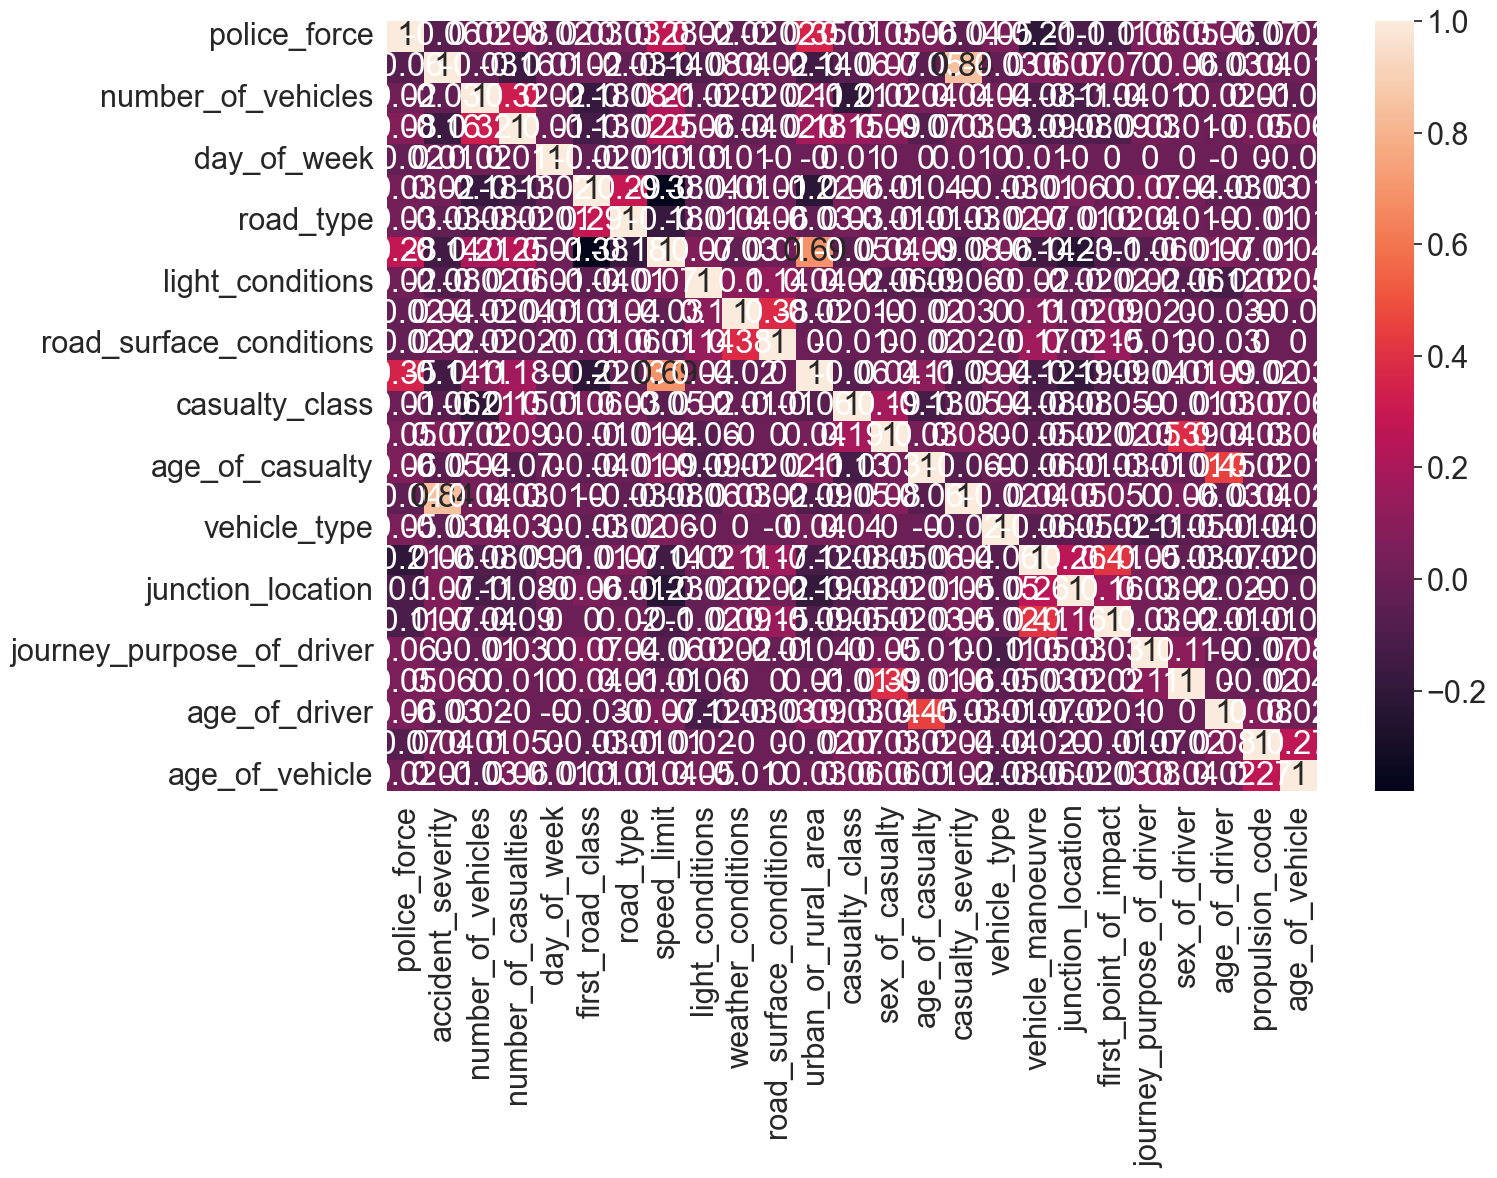

In [64]:
plt.figure(figsize = (15, 10))
correlation_matrix = DF_CORR.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

We plotted a second, more simplistic heatmap.

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_8625/3323017015.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DF_CORR.corr())


<Figure size 1500x800 with 0 Axes>

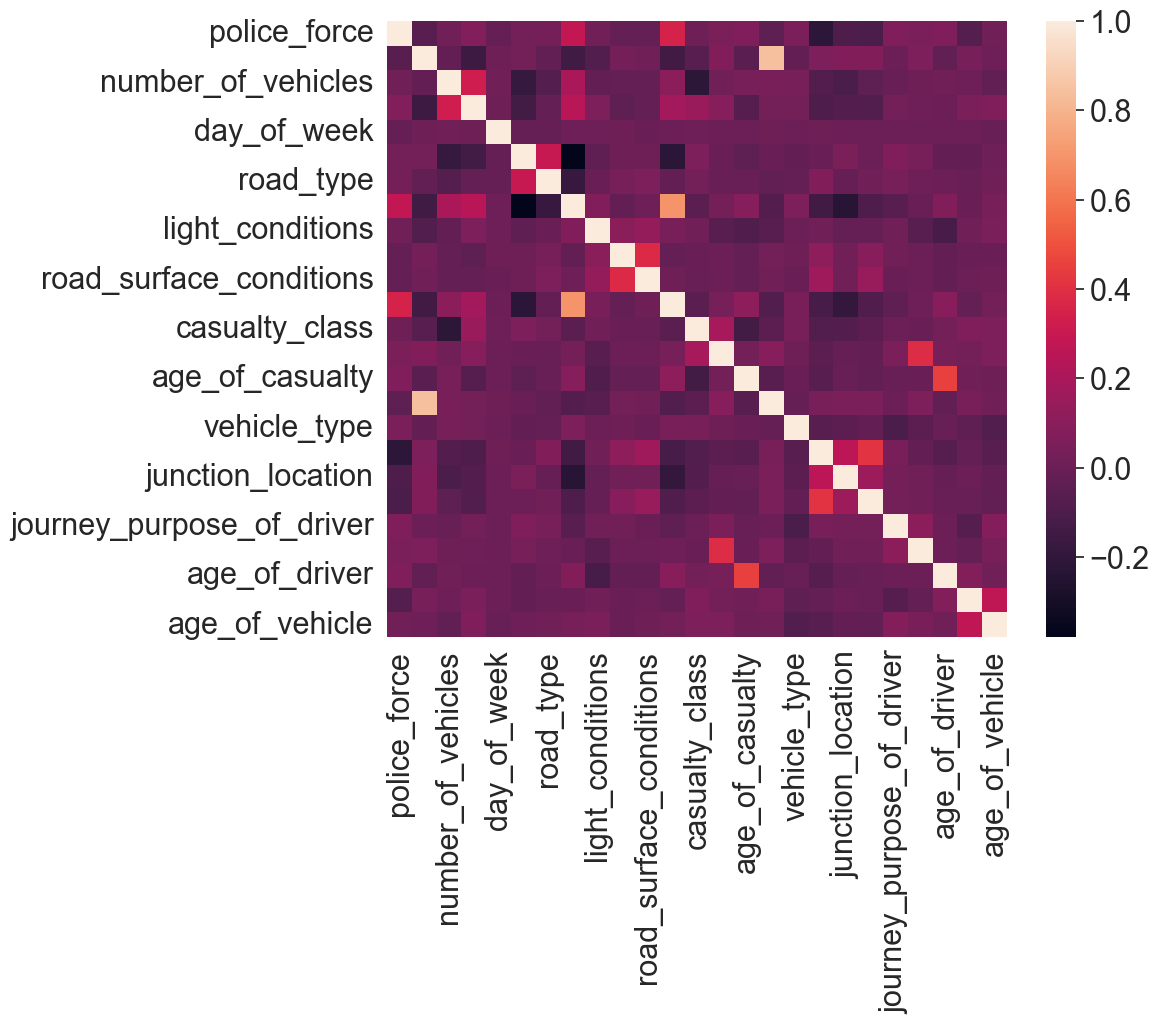

<Figure size 1500x800 with 0 Axes>

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(DF_CORR.corr())
plt.figure()

### 3: ANALYSIS

In this section we will analyse the data that we cleaned and we will investigate what variables are more likely to lead to a traffic accident. 

#### QUESTION 1: Are certain drivers more likely to get involved in a car accident compared to others?

The accident severity is the variable we are most interested in, as it denotes what the accident resulted in: fatality, serious injuries or slight injuries. We will use this variable for the most part of our analysis, because we want to see what factors go into making an accident results in a death, serious injury or slight injury. We will also compare it with external factors such as light and weather conditions, road type, etc.. to find out the factors that increase the likelihood of a traffic accident to happen.

What is the total count of traffic accidents by the accident severity?

In [66]:
accident_severity_counts = DF.accident_severity.value_counts()
accident_severity_counts

3    103064
2     28403
1      2747
Name: accident_severity, dtype: int64

Plotting the total count into a pie chrt to better visualise the difference. 76.7% of traffic accidents in 2021 were slight, with nearly a quarted being serious. A very small percentage of traffic accidents results in death.

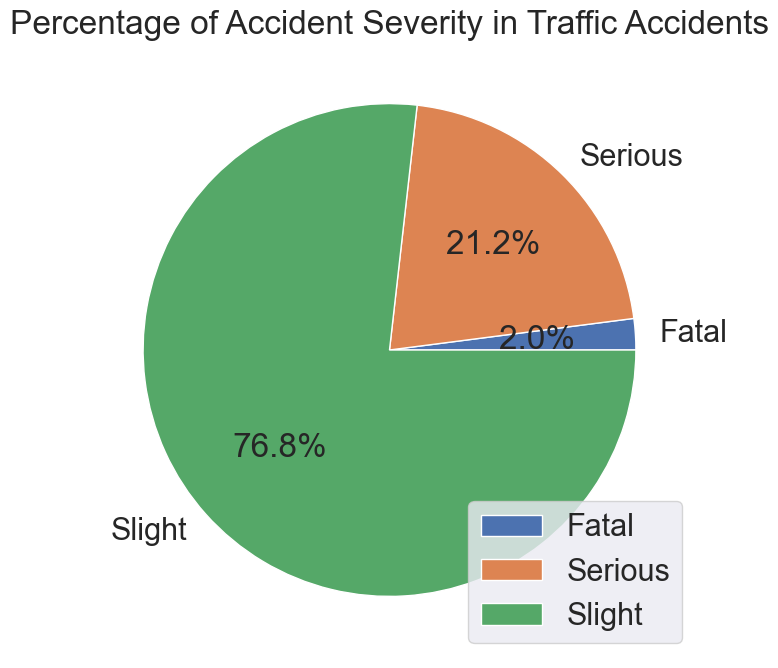

In [67]:
fatal = accident_severity_counts[1]
serious = accident_severity_counts[2]
slight = accident_severity_counts[3]

# Slices/ ratio
slices = [fatal,serious,slight]

# Labels
severity = ["Fatal", "Serious", "Slight"]

#Pie
plt.pie(slices, labels = severity,autopct='%1.1f%%')

# Other elements of pie
plt.legend(loc="lower right")
plt.title('Percentage of Accident Severity in Traffic Accidents')
plt.show()

What are the total accidents for each age band of the driver?

Whilst doing the analysis, we noticed that the total count of accidents per the age band of the driver included a variable '12'. Therefore, we decided to create a new variable that will store the dataset without the 12; we kept the dataset 'DF' as it is, because this will only impact the age band of the driver analysis.

In [68]:
DF_AB = DF[DF.age_band_of_driver !=  12]

In [69]:
# The count of the age band of the driver.

age_band_of_driver_count = DF_AB.age_band_of_driver.value_counts().sort_index()
age_band = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-35", "36-45", "46-55", "56-65", "66-75", "75>"]
age_band_of_driver_count

1        20
2       250
3      1185
4      9867
5     15447
6     32558
7     24643
8     20643
9     13773
10     6374
11     3928
Name: age_band_of_driver, dtype: int64

Plotting the findings into a bar chart to better understand the difference in the total of traffic accidents that a driver may get involved in. From the chart, it is clear that 26-35 year olds are more likely to have a traffic accident. What surprised us was the low number of 16-20 and 21-25 who get into traffic accidents compared to older age bands, as we thought that younger people would be more reckless.

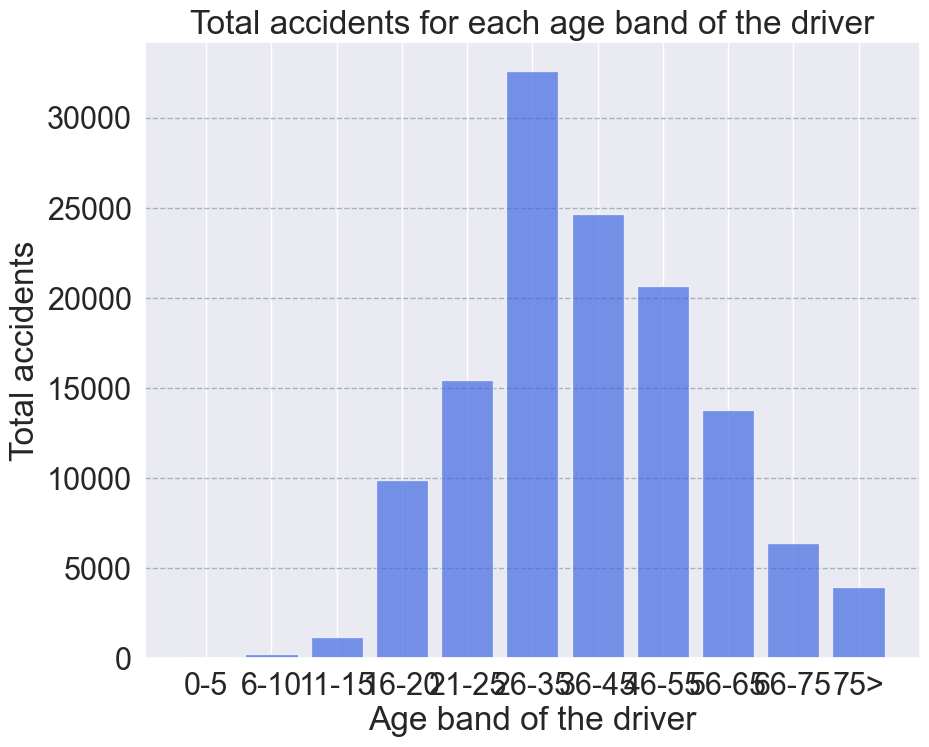

In [70]:
# figure
plt.figure(figsize=(10,8))

# bar
plt.bar(age_band, age_band_of_driver_count, color='royalblue', alpha=0.7)

# x-axis
plt.xlabel('Age band of the driver')
plt.xticks(age_band)

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents for each age band of the driver')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.8)
plt.show()

In [71]:
""" there is a -1 in this, need to further clean the data """
# The count of the age band of the casualties

age_band_of_casualty_count = DF_AB.age_band_of_casualty.value_counts().sort_index()
age_band = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-35", "36-45", "46-55", "56-65", "66-75", "75>"]
age_band_of_casualty_count

-1      1251
 1      1907
 2      2929
 3      4812
 4     12605
 5     15623
 6     29131
 7     20332
 8     17872
 9     11947
 10     5919
 11     4360
Name: age_band_of_casualty, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (11,) and arg 1 with shape (12,).

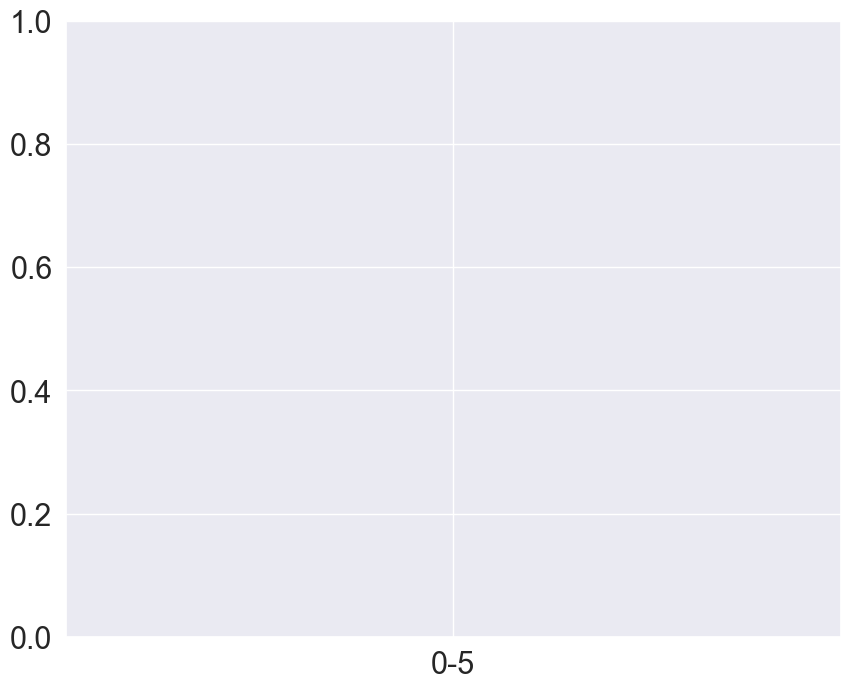

In [72]:
# age band of casualty bar chart
# figure
plt.figure(figsize=(10,8))

# bar
plt.bar(age_band, age_band_of_casualty_count, color='royalblue', alpha=0.7)

# x-axis
plt.xlabel('Age band of casualty')
plt.xticks(age_band)

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total casualties for each casualty age band')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.8)
plt.show()

We are looking at the gender difference of drivers in traffic accidents, which shows that men are twice as likely to be involved in a collision. Surprisingly, the casualty difference of gender is not as drastic.

In [74]:
# The count of drivers involved by gender
sex_of_driver_count = DF.sex_of_driver.value_counts()
sex_of_driver_count

1    95875
2    38339
Name: sex_of_driver, dtype: int64

In [75]:
# The count of casualty by gender
sex_of_casualty_count = DF.sex_of_casualty.value_counts()
sex_of_casualty_count

1    84664
2    49550
Name: sex_of_casualty, dtype: int64

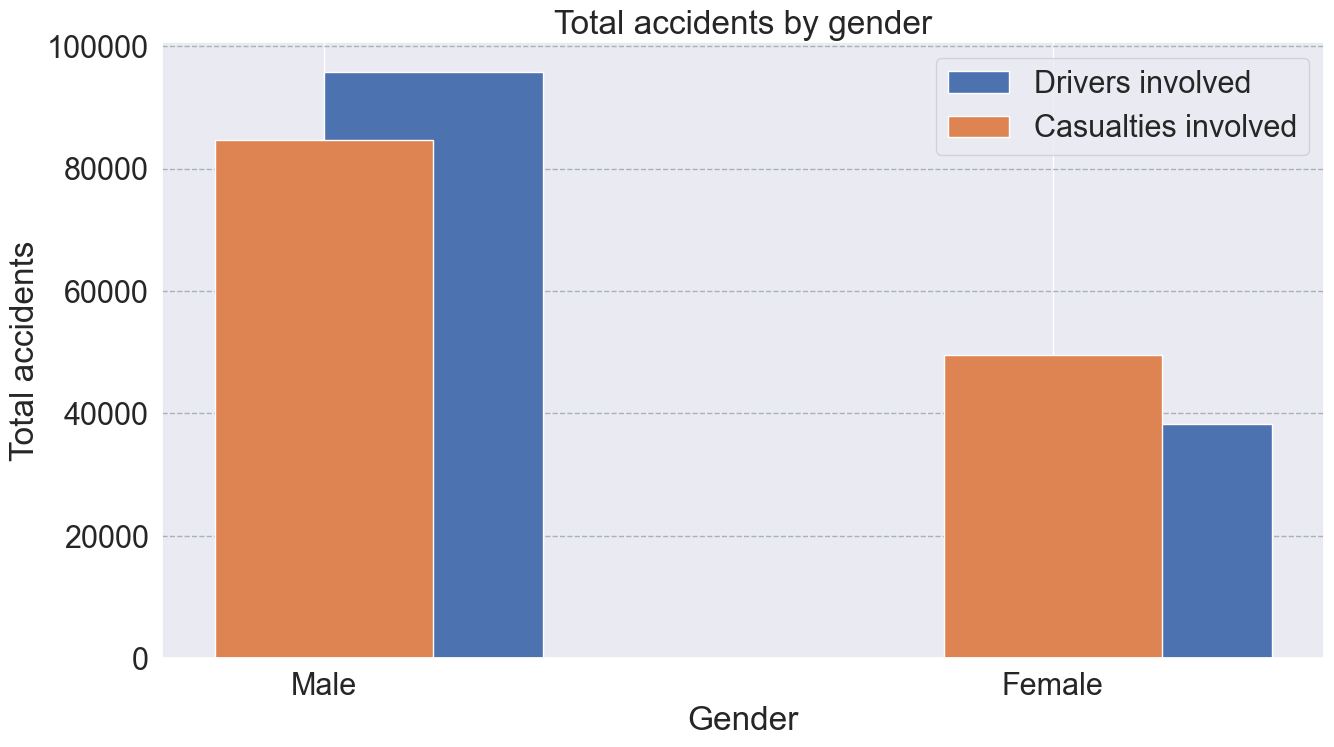

In [76]:
# visualising accidents by driver gender
plt.bar(["Male","Female"], sex_of_driver_count, align='edge', width=0.3)
plt.bar(["Male","Female"], sex_of_casualty_count,  width=0.3)

# x-axis
plt.xlabel('Gender')

#y-axis
plt.ylabel('Total accidents')

# other elements
plt.title('Total accidents by gender')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.8)
plt.legend(["Drivers involved","Casualties involved"])

plt.show()

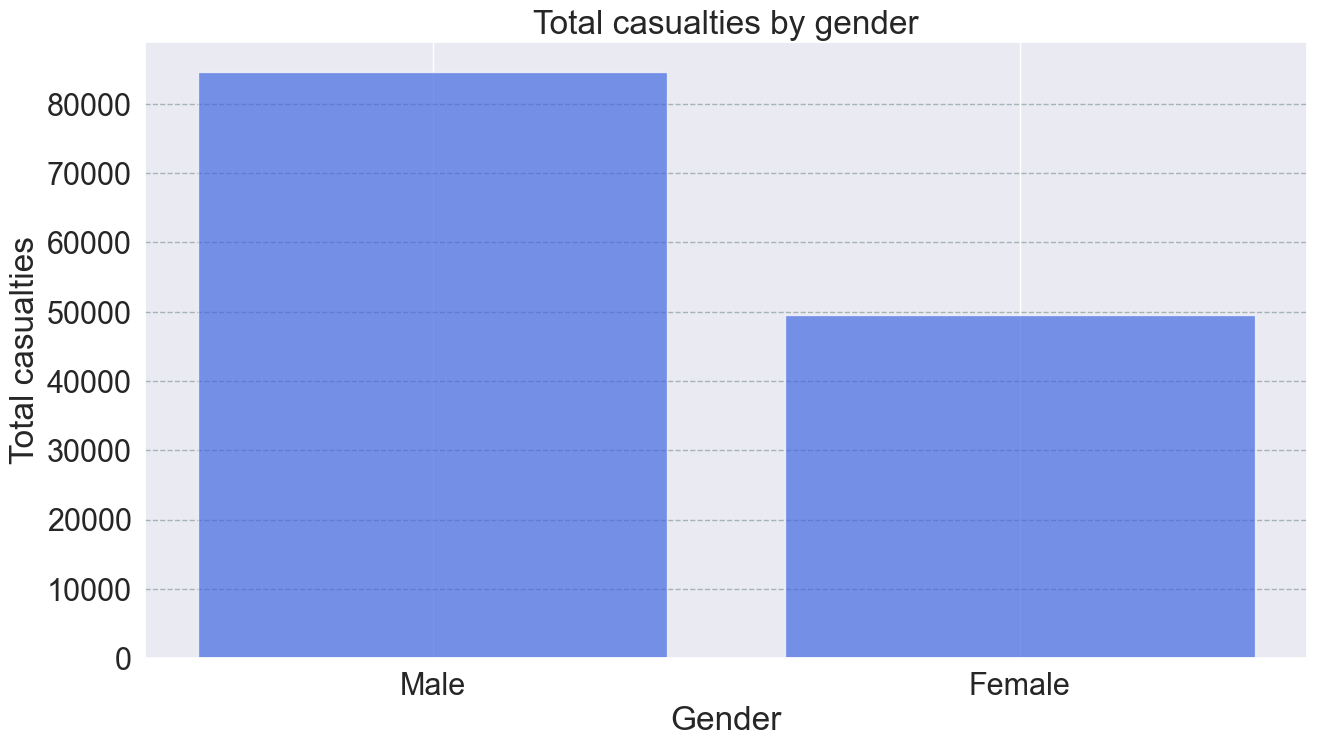

In [77]:
# visualising casualty by gender

plt.bar(["Male","Female"], sex_of_casualty_count, color='royalblue', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Total casualties')
plt.title('Total casualties by gender')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.8)

plt.show()

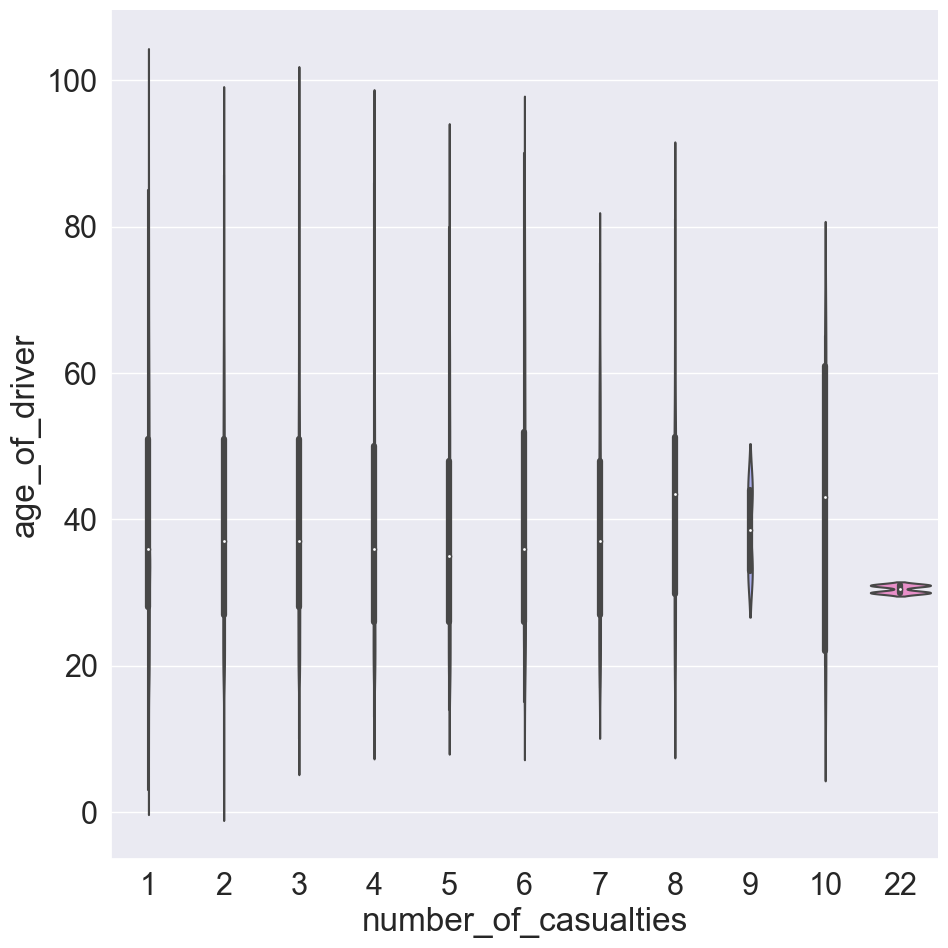

In [78]:
'''can be deleted '''
sns.catplot(y= "age_of_driver", x= "number_of_casualties", data=DF, kind = 'violin', height=10, aspect=1)

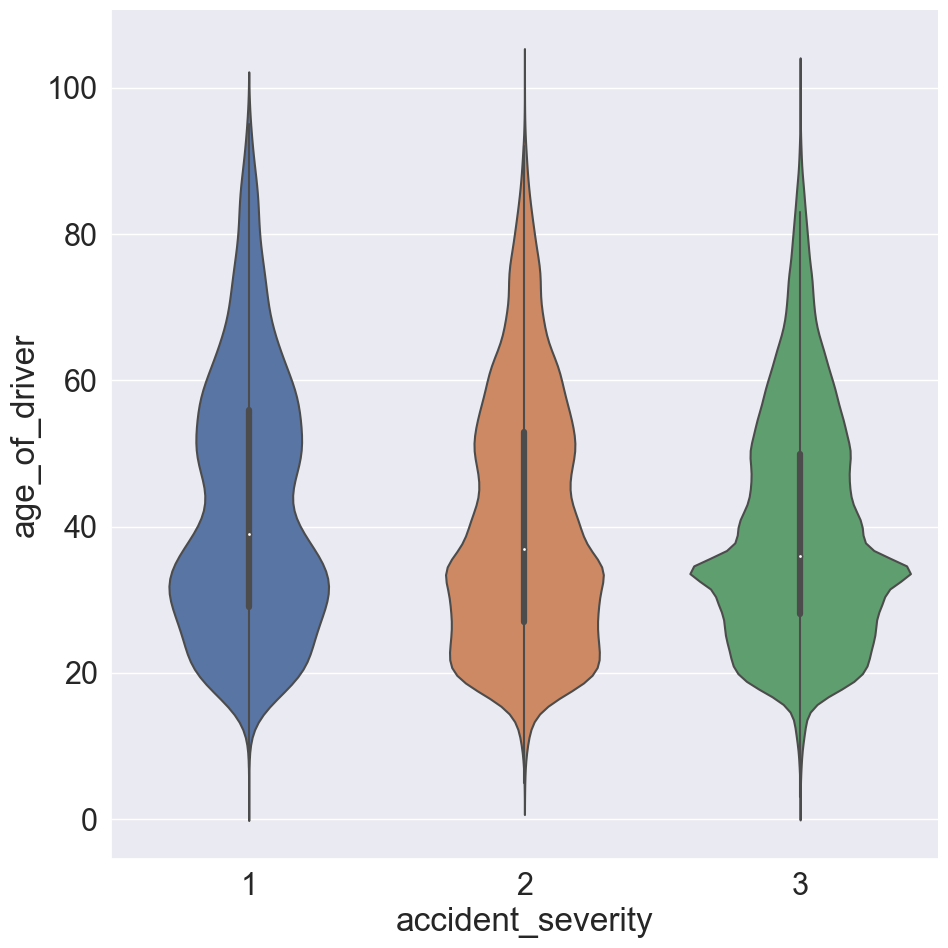

In [79]:
'''can be deleted '''
sns.catplot(y= "age_of_driver", x= "accident_severity", data=DF, kind = 'violin', height=10, aspect=1)

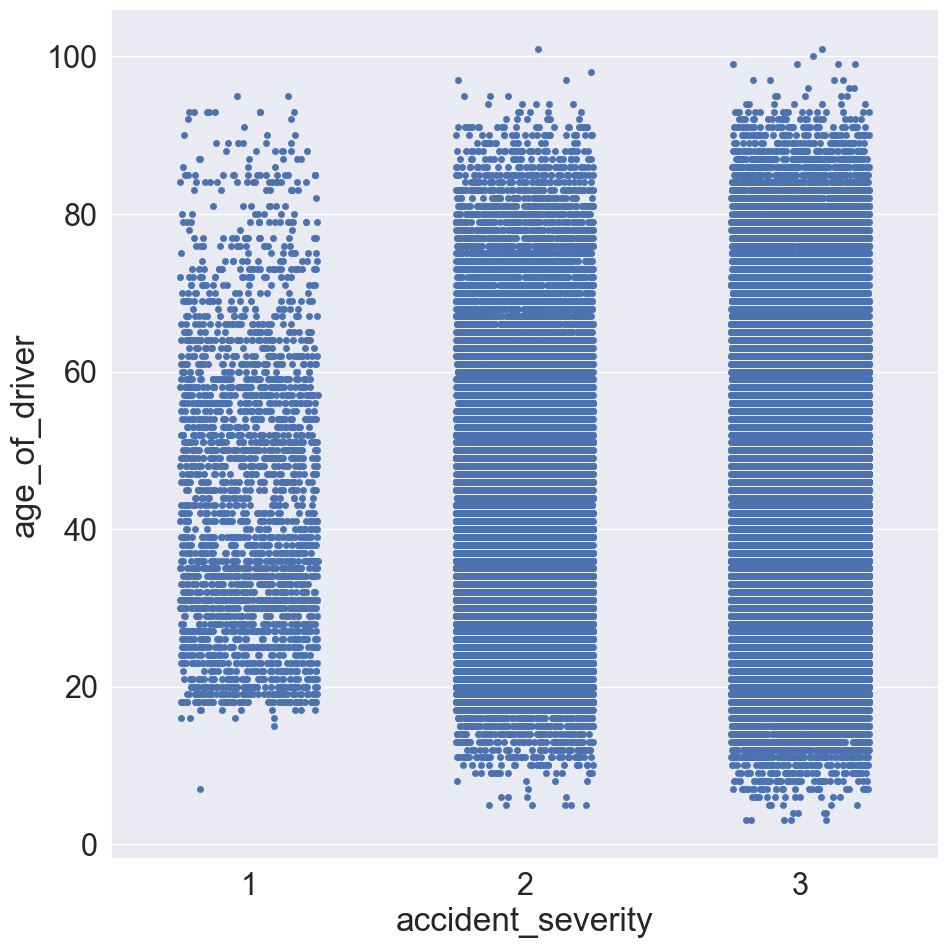

In [80]:
'''can be deleted '''
sns.catplot(y= "age_of_driver", x= "accident_severity", jitter=0.25, data=DF,  height=10, aspect=1)

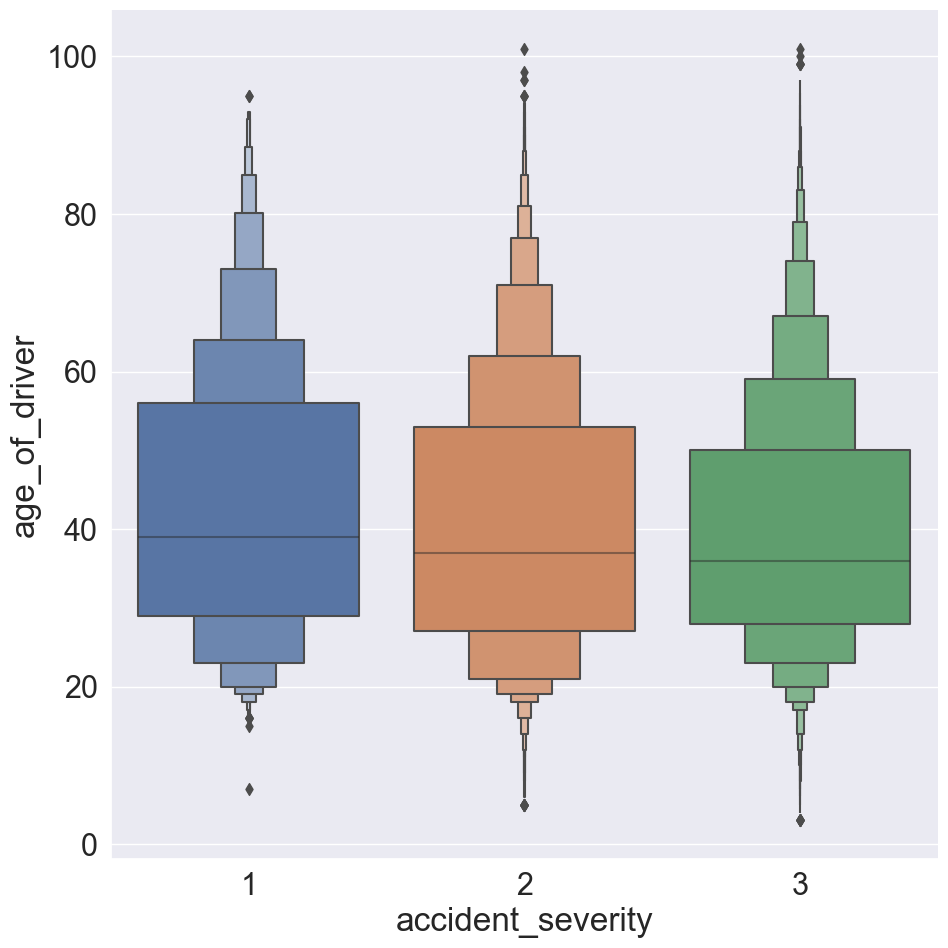

In [81]:
'''can be deleted '''
sns.catplot(y= "age_of_driver", x= "accident_severity", kind = 'boxen', data=DF, height=10, aspect=1)

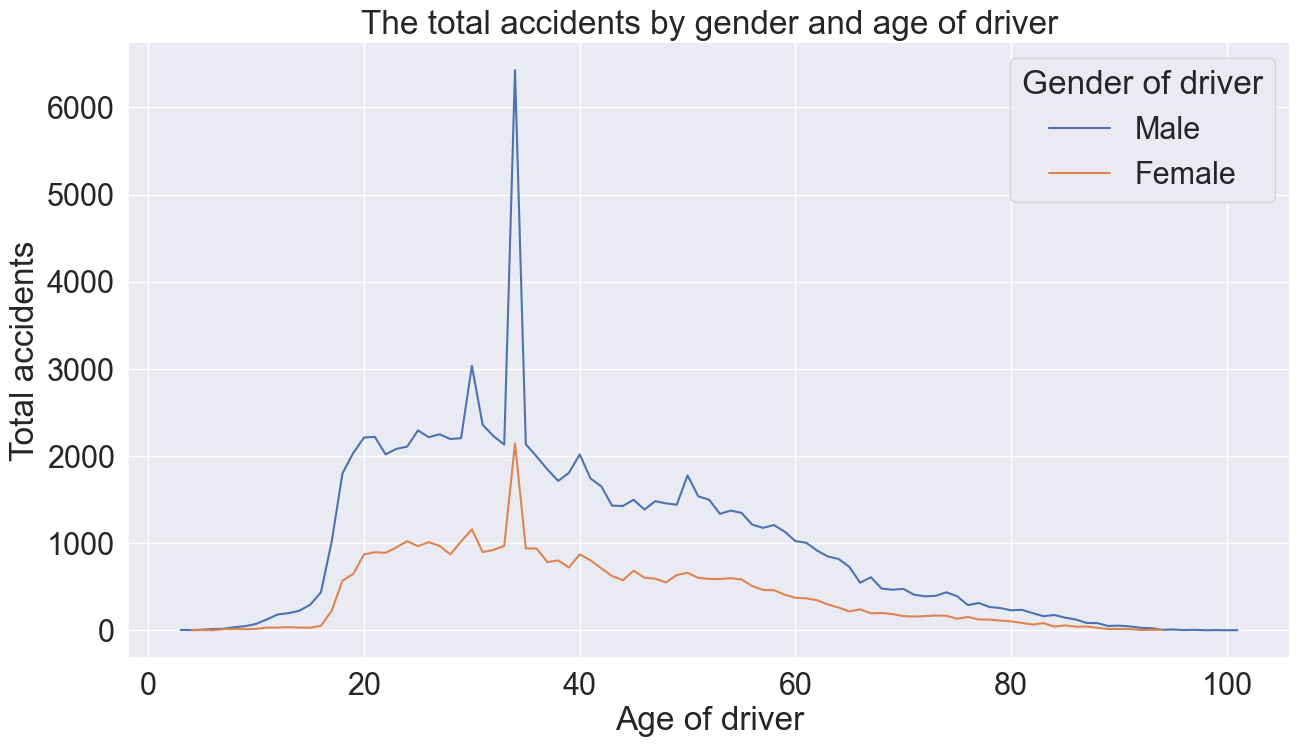

In [82]:
GEN_AGE_AF = DF[['sex_of_driver','sex_of_casualty','age_of_driver', 'age_band_of_driver','age_of_casualty','age_band_of_casualty','casualty_severity']]
PIVOT_TBL_1a = GEN_AGE_AF.pivot_table(
   index = 'age_of_driver',
   columns="sex_of_driver",
   aggfunc = "count")['casualty_severity']

PIVOT_TBL_1a.plot(kind="line", figsize=(15,8))

#x-axis
plt.xlabel('Age of driver')

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('The total accidents by gender and age of driver')

plt.legend(labels=["Male", "Female"], title="Gender of driver", loc="upper right")

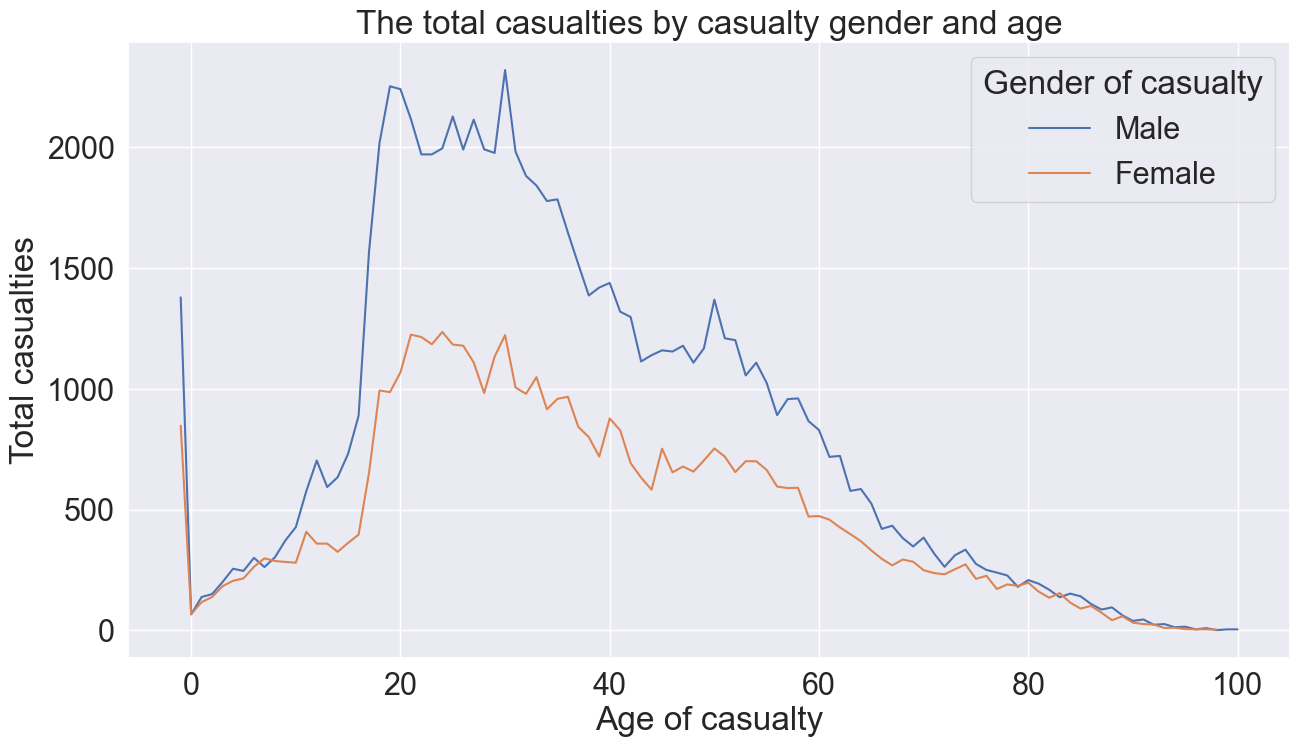

In [83]:
PIVOT_TBL_1b= GEN_AGE_AF.pivot_table(
   index = 'age_of_casualty',
   columns="sex_of_casualty",
   aggfunc = "count")['casualty_severity']

PIVOT_TBL_1b.plot(kind="line", figsize=(15,8))

#x-axis
plt.xlabel('Age of casualty')

# y-axis
plt.ylabel('Total casualties')

# other elements of the plot
plt.title('The total casualties by casualty gender and age')

plt.legend(labels=["Male", "Female"], title="Gender of casualty", loc="upper right")

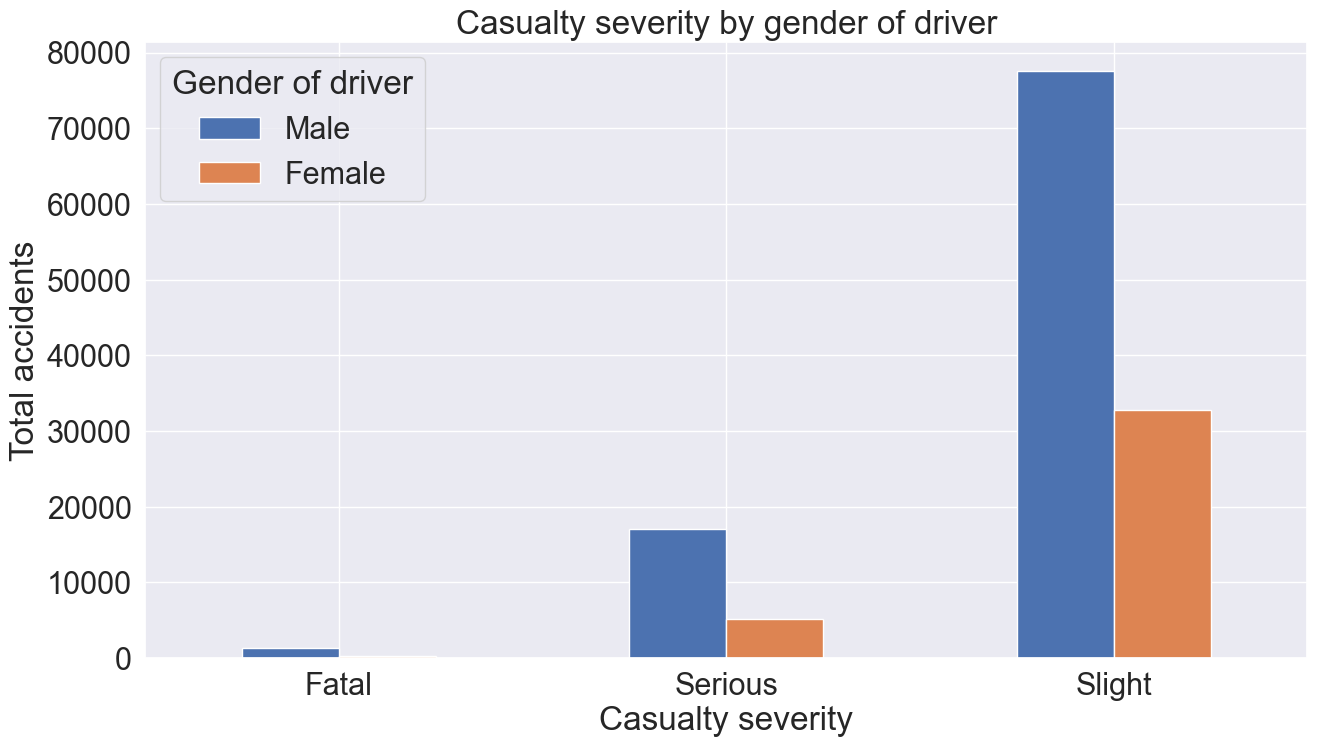

In [84]:
PIVOT_TBL_1c = GEN_AGE_AF.pivot_table(
   index = 'casualty_severity',
   columns="sex_of_driver",
   aggfunc = "count")['age_of_driver']

PIVOT_TBL_1c.plot(kind="bar", figsize=(15,8))

plt.xlabel('Casualty severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')
plt.ylabel('Total accidents')
plt.title('Casualty severity by gender of driver')
plt.legend(title="Gender of driver", labels=["Male", "Female"], loc="upper left")

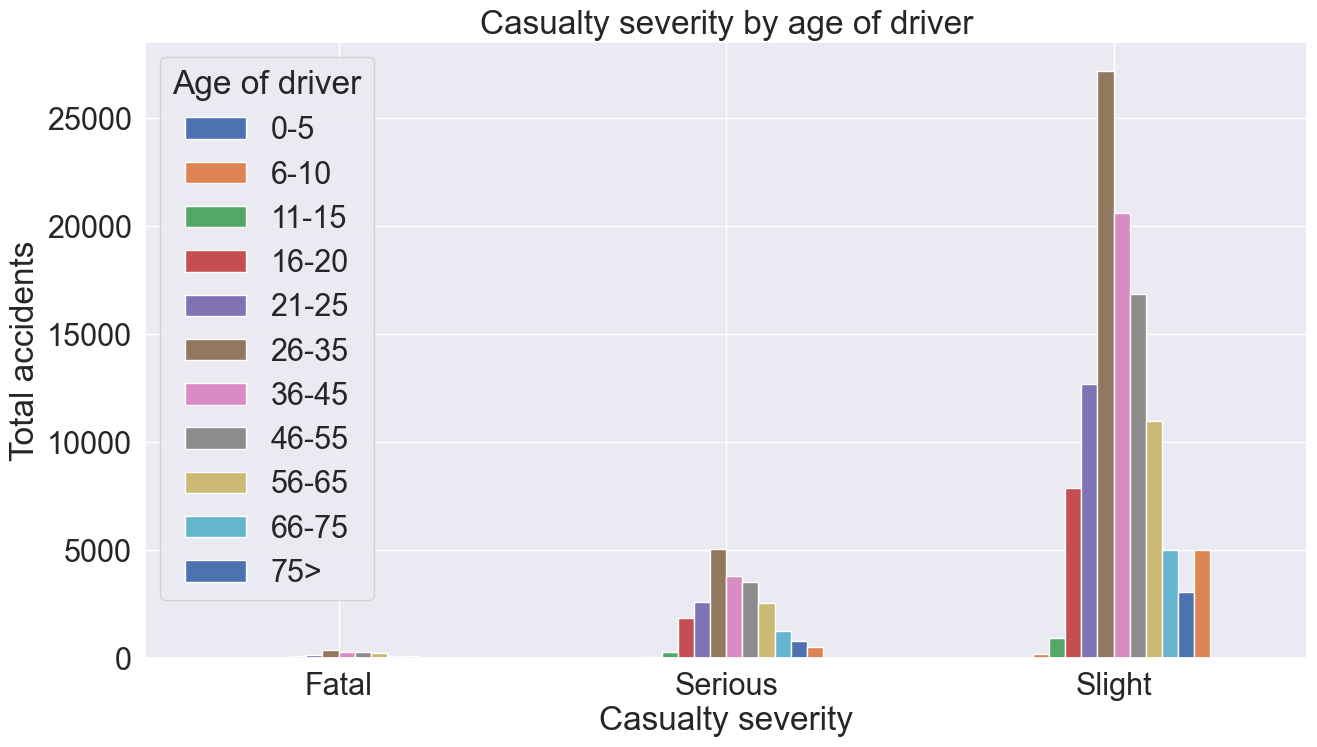

In [85]:
PIVOT_TBL_1d = GEN_AGE_AF.pivot_table(
   index = 'casualty_severity',
   columns="age_band_of_driver",
   aggfunc = "count") ["sex_of_driver"]

PIVOT_TBL_1d.plot(kind="bar", figsize=(15,8))

plt.xlabel('Casualty severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')
plt.ylabel('Total accidents')
plt.title('Casualty severity by age of driver')
plt.legend(title="Age of driver", labels=age_band, loc="upper left")

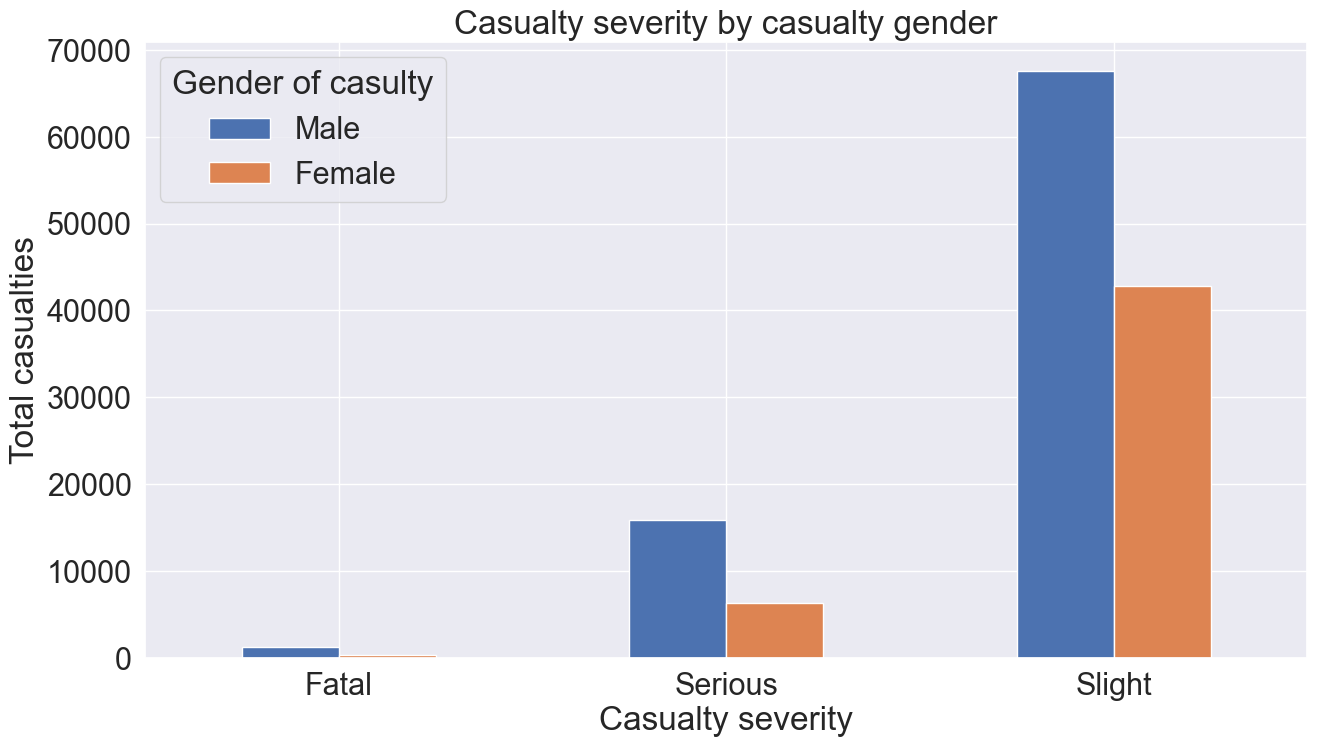

In [86]:
PIVOT_TBL_1e = GEN_AGE_AF.pivot_table(
   index = 'casualty_severity',
   columns="sex_of_casualty",
   aggfunc = "count")['age_of_casualty']

PIVOT_TBL_1e.plot(kind="bar", figsize=(15,8))


plt.xlabel('Casualty severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')
plt.ylabel('Total casualties')
plt.title('Casualty severity by casualty gender')
plt.legend(title="Gender of casulty", labels=["Male", "Female"], loc="upper left")

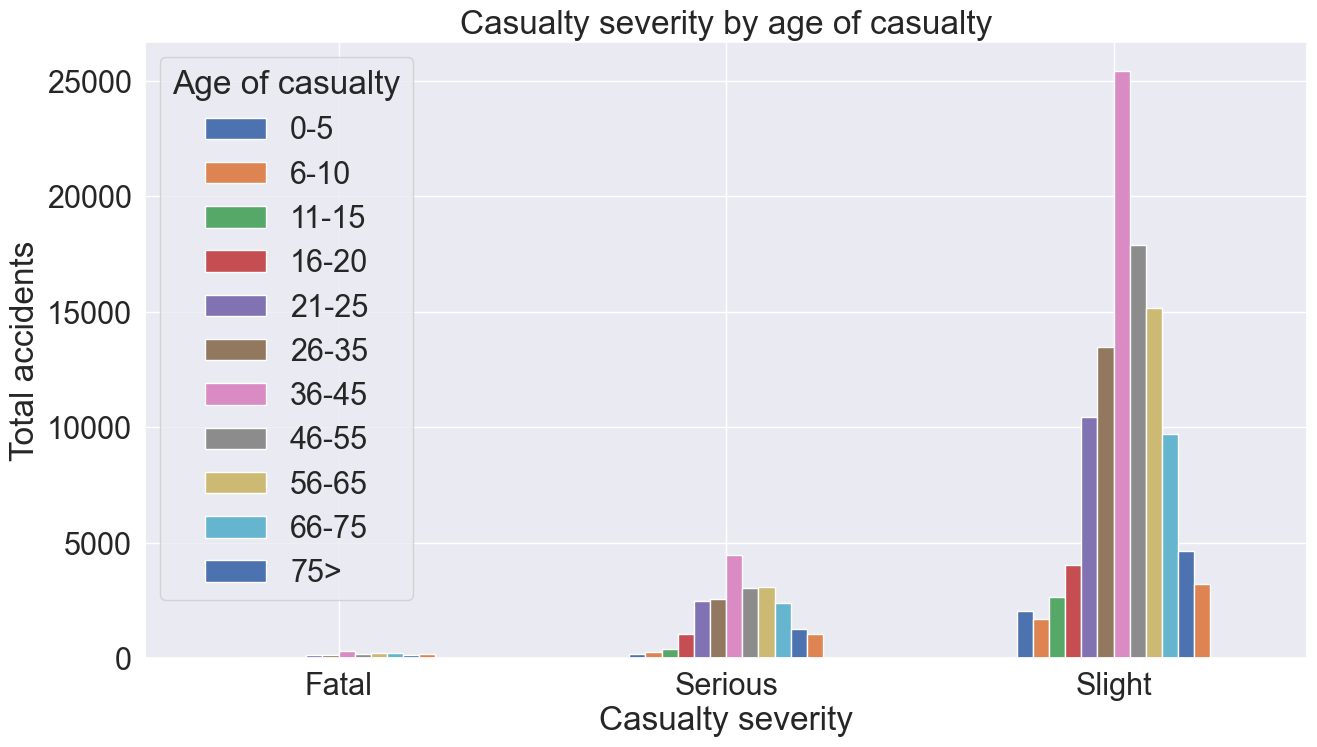

In [87]:
PIVOT_TBL_1f = GEN_AGE_AF.pivot_table(
   index = 'casualty_severity',
   columns="age_band_of_casualty",
   aggfunc = "count") ["sex_of_casualty"]

PIVOT_TBL_1f.plot(kind="bar", figsize=(15,8))

plt.xlabel('Casualty severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')
plt.ylabel('Total accidents')
plt.title('Casualty severity by age of casualty')
plt.legend(title="Age of casualty", labels=age_band, loc="upper left")

In [88]:
# correlation graphs?

### QUESTION 2: What times are more likely to have a higher number of traffic accidents?

We started by looking widely at the months of the year to see which one of them have a higher likelihood of a traffic accident to happen. We looked at the column 'date' and turned it into months so it is easier to see the overall for each month.

In [89]:
# The count of accidents per month
DF['month'] = pd.DatetimeIndex(DF['date']).month
month_count = DF.month.value_counts().sort_index()
month_count

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_8625/2426346256.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  DF['month'] = pd.DatetimeIndex(DF['date']).month


1      9245
2      8768
3     10149
4     12422
5     13121
6     12190
7     12661
8     12135
9     12759
10    10879
11    10351
12     9534
Name: month, dtype: int64

We then plotted our findings in a line graph; we were a little surprised, because we expected traffic accidents to happen more often in the months that have more rain and wind. From this line graph, we can see that a majority of accidents happen during spring and summer. We theorise that this is because people go out more often due to the nicer weather conditions.

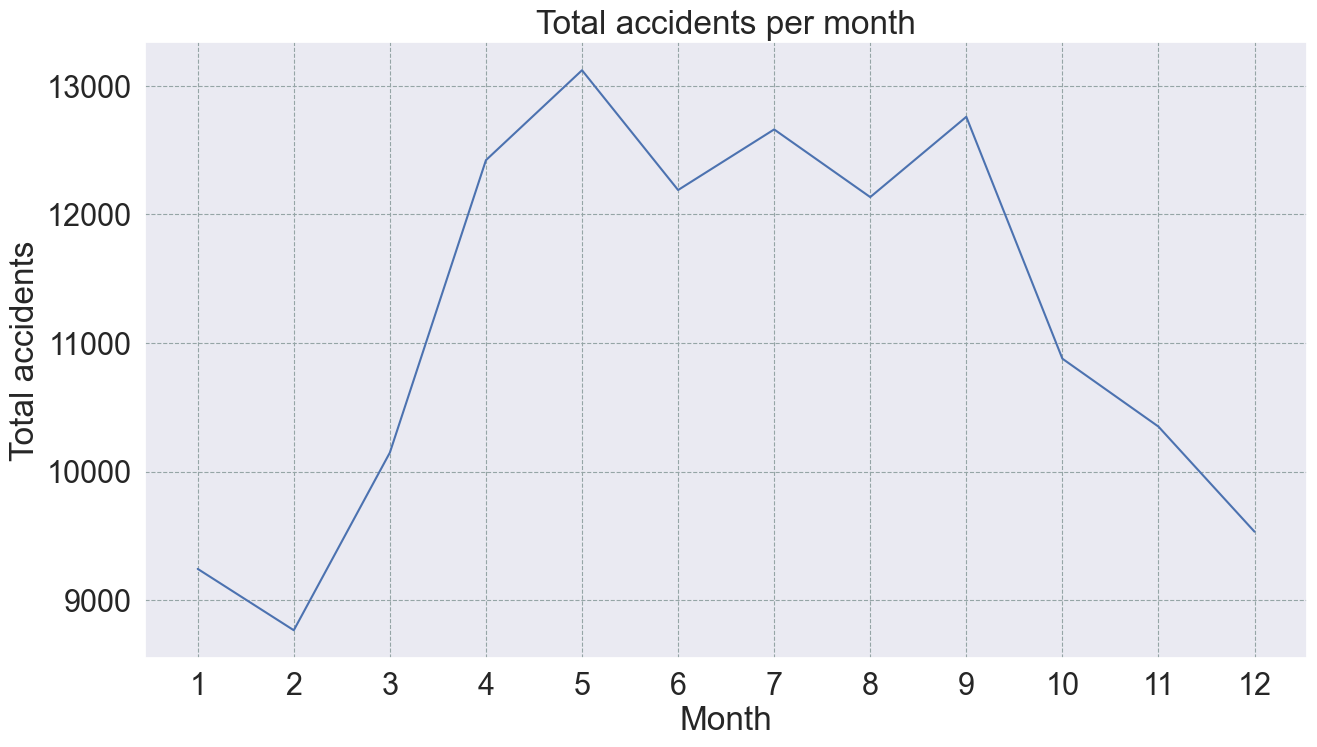

In [90]:
# Plotting the accidents per month
# line
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], month_count)

# x-axis
plt.xlabel('Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents per month')
plt.grid(color='#95a5a6', linewidth= 0.8, linestyle="--")
plt.show()

Then, we looked into the days. We did a value count of them to be able to plot it into a line graph.

In [91]:
# The count of accidents per day of week
day_of_week_count = DF.day_of_week.value_counts().sort_index()
day_of_week_count

1    15541
2    18471
3    18955
4    19493
5    19977
6    22533
7    19244
Name: day_of_week, dtype: int64

## The labels are wrong. So I changed the explanation ###
This line graph shows the overall increase from day-to-day and Friday has the higher likelihood of a traffic accident happening. A lot more people travel during fridays for dinner, grocery shopping, etc..

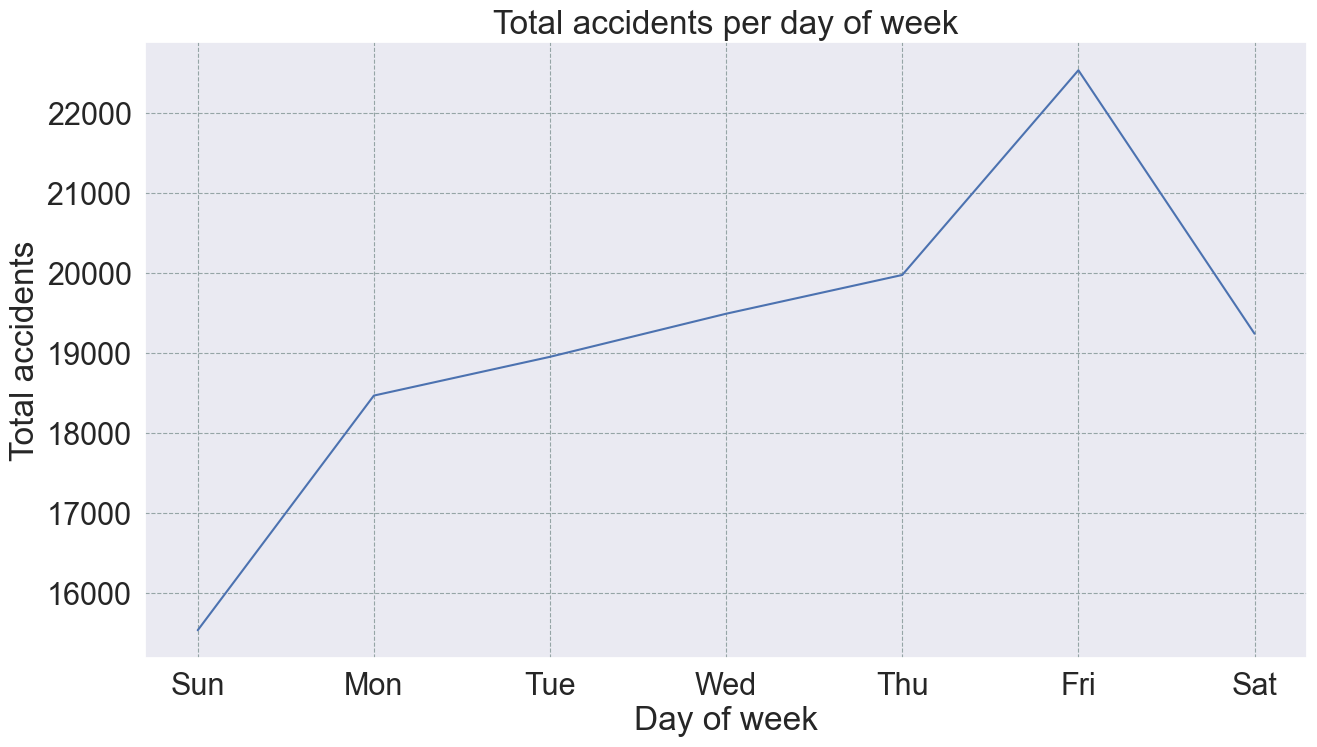

In [92]:
# Plotting the accidents per month
# line
plt.plot(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"], day_of_week_count)

# x-axis
plt.xlabel('Day of week')
plt.xticks(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents per day of week')
plt.grid(color='#95a5a6', linewidth= 0.8, linestyle="--")
plt.show()

After our break-down of the days, we wanted to look even deeper to see what the data could tell us. We created a pivot table to see each day individually and how traffic accidents happened by the hour.

In [93]:
# count the number of accidents by hour
times = pd.to_datetime(DF.time)
hours = DF.groupby([times.dt.hour]).time.count()
hours

time
0      1750
1      1279
2       817
3       717
4       702
5      1323
6      2321
7      4945
8      7424
9      5727
10     5891
11     7354
12     8453
13     8480
14     9112
15    10805
16    12040
17    11968
18     9338
19     7250
20     5447
21     4402
22     3839
23     2830
Name: time, dtype: int64

Text(0.5, 1.0, 'The total accidents at every hour in 2021')

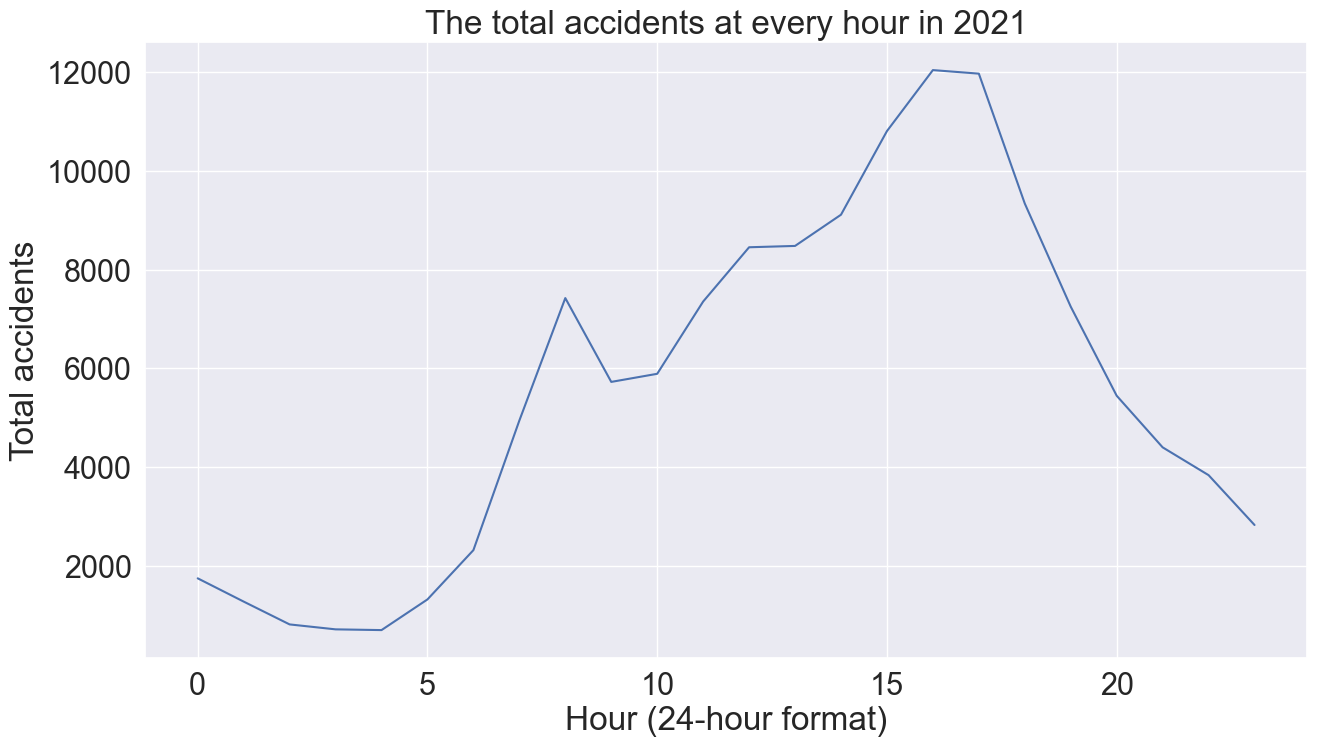

In [94]:
## plot the total accidents by hour ##

# figure size
sns.set(rc={'figure.figsize':(15, 8)}, font_scale = 2)

# line
sns.lineplot(x=range(0,24), y=hours)

# x-axis
plt.xlabel('Hour (24-hour format)')

# y-axis
plt.ylabel('Total accidents')

# other elements
plt.title('The total accidents at every hour in 2021')

In [101]:
# convert all dates to months in DF
DF['month'] = pd.DatetimeIndex(DF['date']).month

# convert all times to hours in DF
DF['hour'] = pd.DatetimeIndex(DF['time']).hour

# preview the new columns
DF[['month','hour']]

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_8625/432761238.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  DF['month'] = pd.DatetimeIndex(DF['date']).month


,month,hour
0,1,2
1,1,3
2,1,3
3,1,3
4,1,3
...,...,...
134209,5,8
134210,12,18
134211,12,18
134212,12,18


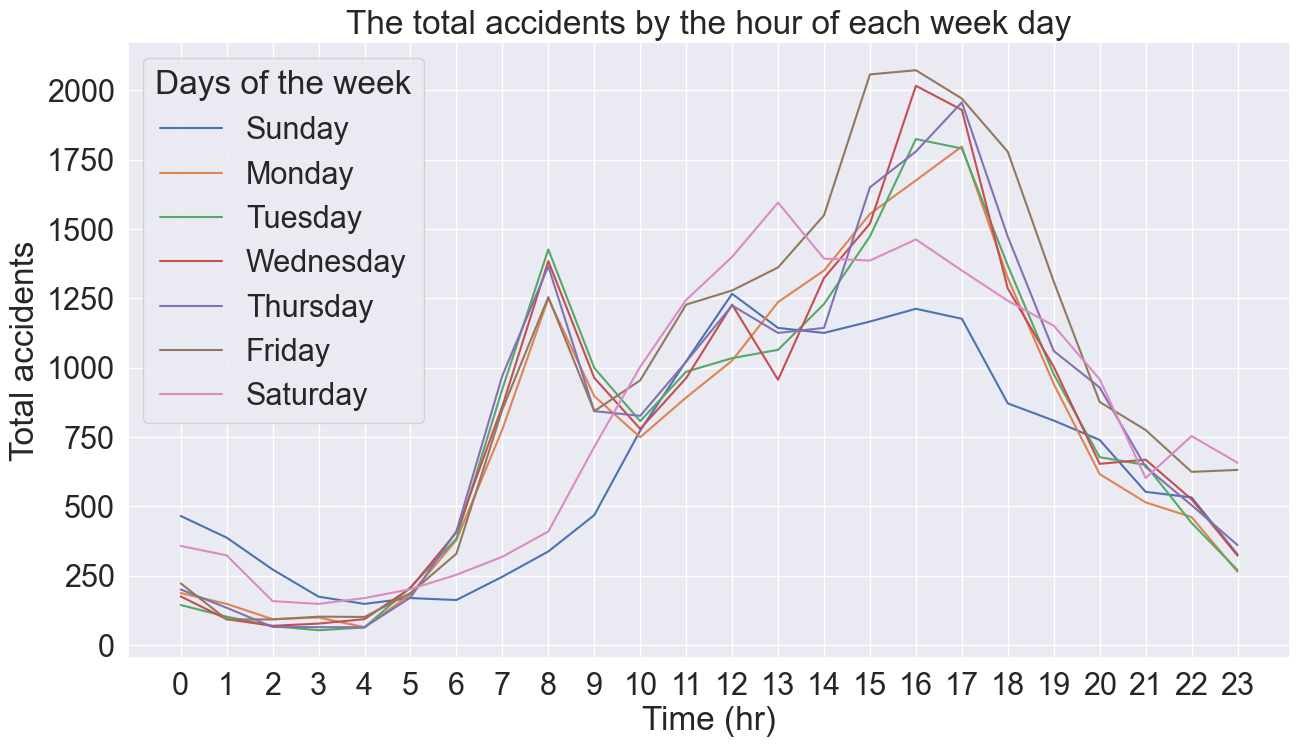

In [104]:
DAY_HOUR_MONTH_DF = DF[['day_of_week','casualty_severity', 'hour', 'month']]

days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

PIVOT_TBL_2a = DAY_HOUR_MONTH_DF.pivot_table(
   index = 'hour',
   columns="day_of_week",
   aggfunc = "count")['casualty_severity']

PIVOT_TBL_2a.plot(kind="line", figsize=(15,8))

plt.xlabel('Time (hr)')

# y-axis
plt.ylabel('Total accidents')
plt.xticks(range(0, 24))

# other elements of the plot
plt.title('The total accidents by the hour of each week day')

plt.legend(labels=days, title="Days of the week", loc="upper left")

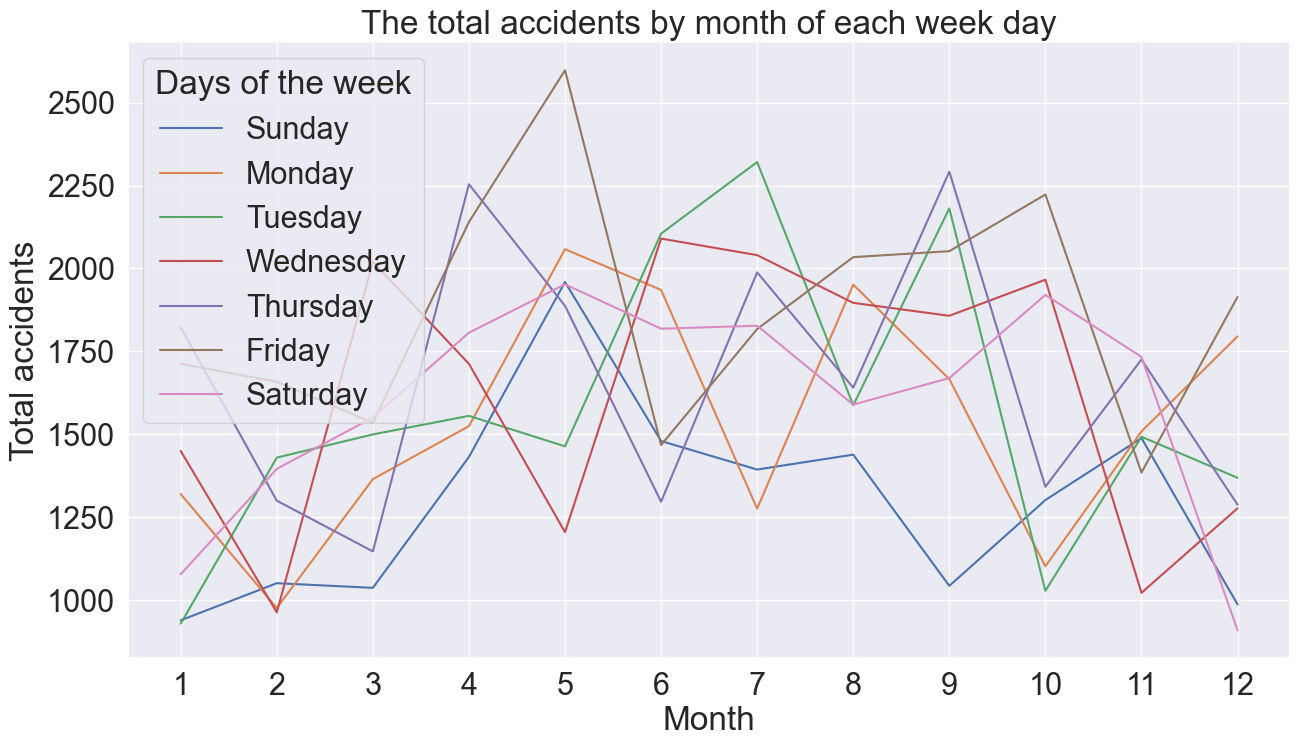

In [105]:
PIVOT_TBL_2b = DAY_HOUR_MONTH_DF.pivot_table(
   index = 'month',
   columns="day_of_week",
   aggfunc = "count")['casualty_severity']

PIVOT_TBL_2b.plot(kind="line", figsize=(15,8))

plt.xlabel('Month')
plt.xticks(range(1, 13))

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('The total accidents by month of each week day')

plt.legend(labels=days, title="Days of the week", loc="upper left")

We then looked at the weather conditions and compared them to the hour of the day, based on the accident severity. It looks like the majority of accidents, fatal, serious and slight, happen during fine weather with no high winds. 

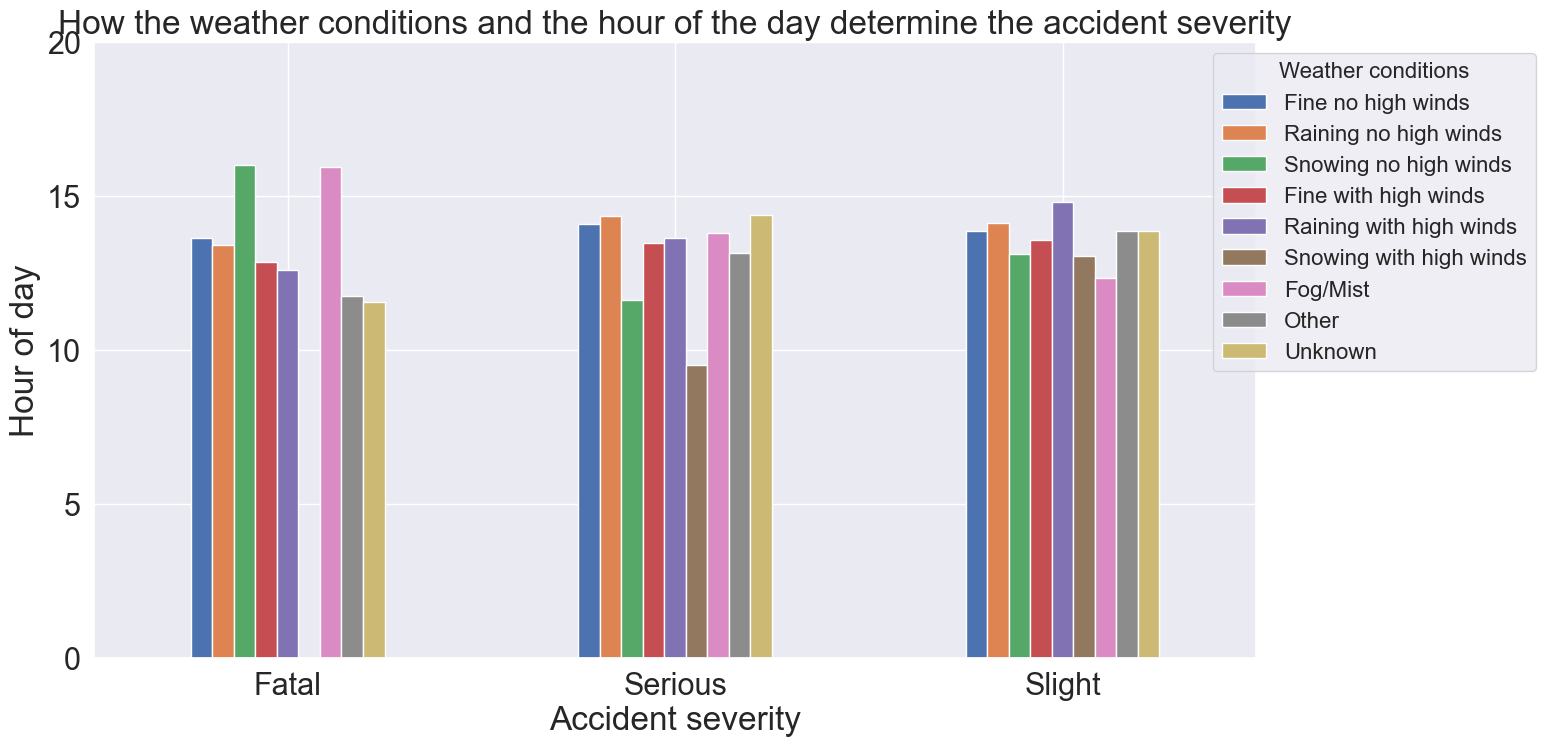

In [107]:
WTHR_LIGHT = DF[['hour','accident_severity', 'weather_conditions', 'light_conditions']]

wthr_labels = ["Fine no high winds", "Raining no high winds", "Snowing no high winds", "Fine with high winds", "Raining with high winds", "Snowing with high winds", "Fog/Mist", "Other", "Unknown"]

PIVOT_TBL_2c = WTHR_LIGHT.pivot_table(
   index = 'accident_severity',
   columns= 'weather_conditions')['hour']

PIVOT_TBL_2c.plot(kind="bar", figsize=(15,8))

#x-axis
plt.xlabel('Accident severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

#y-axis
plt.ylabel('Hour of day')
plt.yticks(range(0,24,5), rotation ='horizontal')

#other elements
plt.title('How the weather conditions and the hour of the day determine the accident severity')
plt.legend(title="Weather conditions", title_fontsize='16', labels = wthr_labels, fontsize='16', loc="upper right", bbox_to_anchor=(1.25, 1))

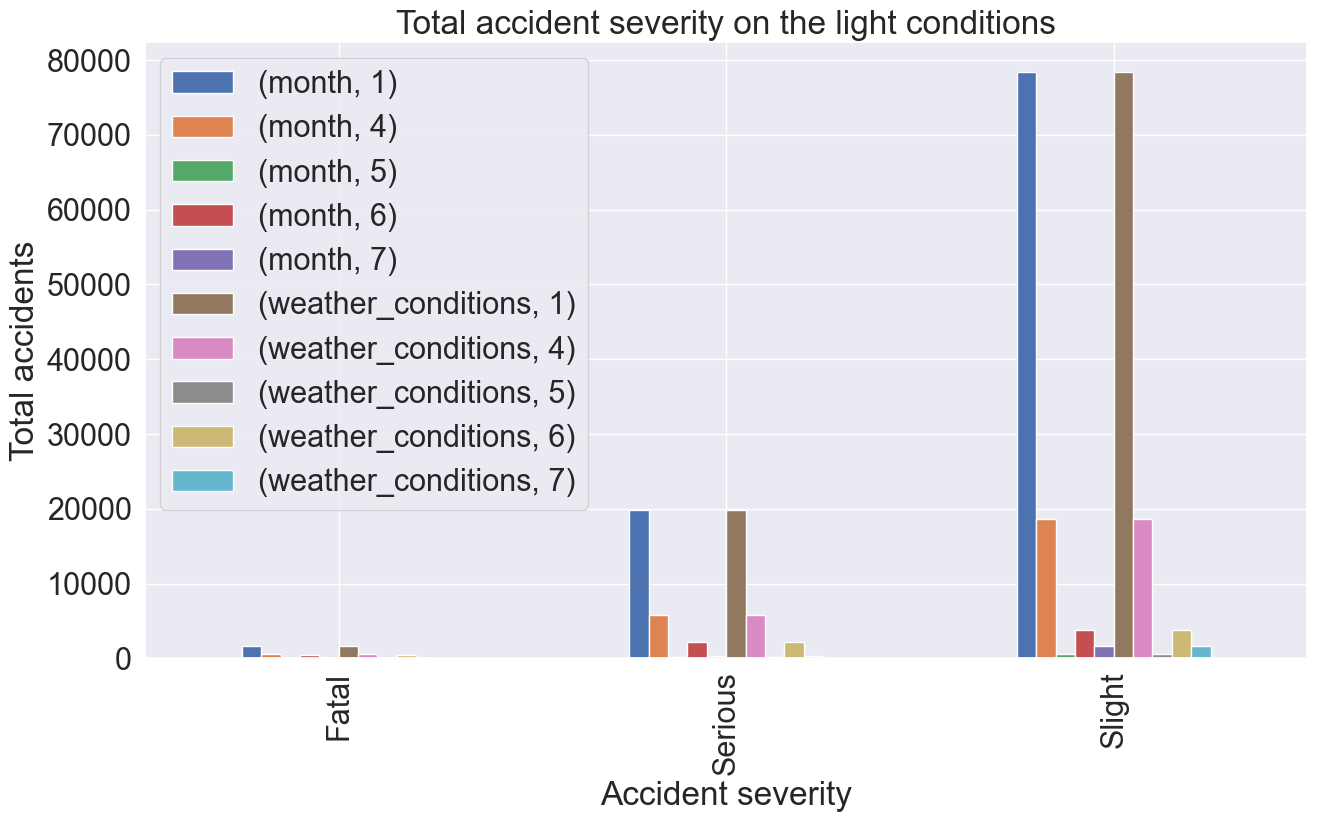

In [108]:
#not sure if this is the same as the graph below #
LIGHT_COND = DF[['light_conditions','month','weather_conditions','accident_severity']]

light_labels = ({1: ["Daylight"], 4: ["Dark - lights lit"], 5:["Dark - lights unlit"], 6:["Dark - no light"], 7:["Dark - light unknown"]})
acc_labels = ({1: ["Fatal"], 2: ["Serious"], 3: ["Slight"]})
LIGHT_COND = LIGHT_COND.replace({"weather_conditions": light_labels})
LIGHT_COND = LIGHT_COND.replace({"accident_severity": acc_labels})


PIVOT_TBL_3 = LIGHT_COND.pivot_table(
   index = 'accident_severity',
   columns="light_conditions",
   aggfunc="count")

PIVOT_TBL_3.plot(kind="bar", xlabel=LIGHT_COND['light_conditions'], ylabel = LIGHT_COND['accident_severity'], figsize=(15,8))

plt.xlabel('Accident severity')
plt.ylabel('Total accidents')
plt.title('Total accident severity on the light conditions')
plt.legend(loc="upper left")

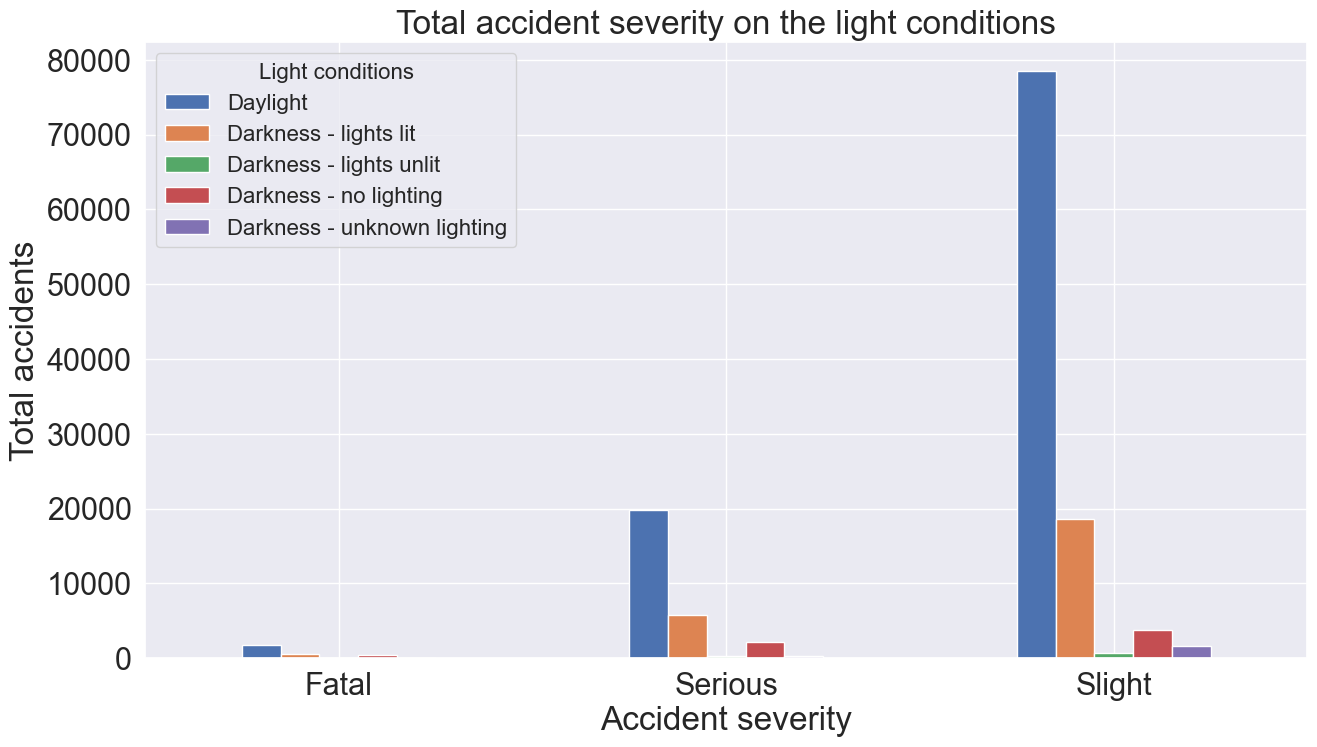

In [111]:
# pivot table to calculate the total accidents by light conditions and accident severity
PIVOT_TBL_2d = WTHR_LIGHT.pivot_table(
   index = 'accident_severity',
   columns="light_conditions",
   aggfunc="count")['hour']

# bar chart
PIVOT_TBL_2d.plot(kind="bar",figsize=(15,8))

#x-axis
plt.xlabel('Accident severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

#y-axis
plt.ylabel('Total accidents')

#other elements
plt.title('Total accident severity on the light conditions')
light_labels = ["Daylight", "Darkness - lights lit", "Darkness - lights unlit", "Darkness - no lighting", "Darkness - unknown lighting"]
plt.legend(title="Light conditions", title_fontsize='16', labels=(light_labels), fontsize='16', loc="upper left")

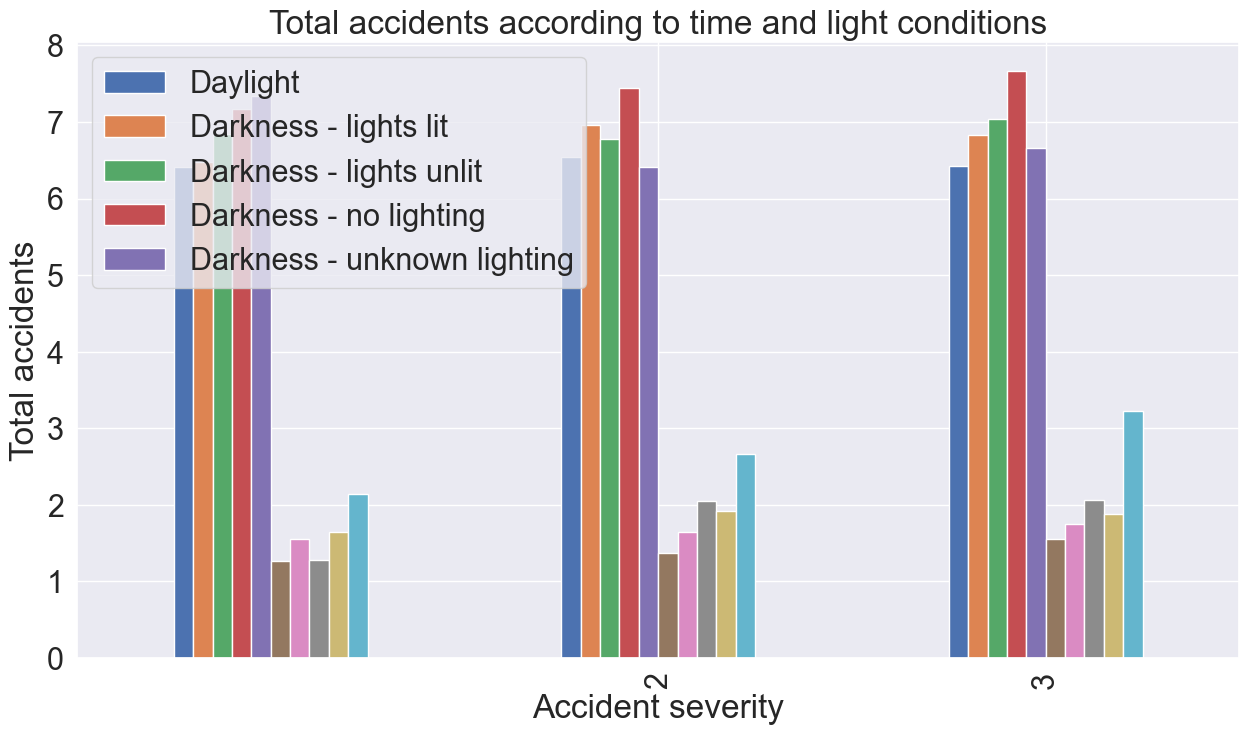

In [112]:
# not sure what this is? #
newdf = DF[['light_conditions','month','weather_conditions','accident_severity']]
pivot = newdf.pivot_table(
   index = 'accident_severity',
   columns="light_conditions")

pivot2 = pivot['month']
pivot.plot(kind="bar", figsize=(15,8))

plt.xlabel('Accident severity')
plt.xticks(range(1,3))

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents according to time and light conditions')

plt.legend(labels=["Daylight", "Darkness - lights lit", "Darkness - lights unlit", "Darkness - no lighting", "Darkness - unknown lighting"], loc="upper left")



### QUESTION 3: What areas in the UK are more likely to have traffic accidents?

In [ ]:
JUNC_COUNTY_ROAD = DF[['junction_location','local_authority_ons_district','road_type','accident_severity']]
PIVOT_TBL_5 = JUNC_COUNTY_ROAD.pivot_table(
   index = 'accident_severity',
   columns="junction_location",
   aggfunc = "count")['local_authority_ons_district']

PIVOT_TBL_5.plot(kind="bar", figsize=(15,8))

plt.xlabel('Accident severity')
plt.xticks(range(0,3),labels=(severity),rotation ='horizontal')

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents according to junction location')

plt.legend(labels=["Not at or within 20 metres of junction", "Approaching junction or waiting/parked at junction approach", "Approaching junction or waiting/parked at junction approach", "Cleared junction or waiting/parked at junction exit", "Leaving roundabout", "Entering roundabout", "Leaving main road", "Entering main road", "Entering from slip road", "Mid Junction - on roundabout or on main road", "Self reported - unknown)"], loc="upper left")

In [ ]:
# not sure what this is ?
newdf = DF[['junction_location','month','weather_conditions','accident_severity']]
pivot = newdf.pivot_table(
   index = 'accident_severity',
   columns="junction_location",
   aggfunc = "count")

pivot2 = pivot['month']
pivot2

We also wanted to make use of the latitude and longitude columns by mapping them on the UK map. For this we used folium and geopy.

One of the limitations of using Nominatim's API is the fact that it is unable to handle our large dataset; it can only handle 1,000 values and our dataset (after making the accident index unique) is about 14,000 rows. Therefore, we were only able to plot the fatal accidents.

To start, we will use a new variable MAP_DF to bring together the columns that we are interested in. This is because we want to make sure the API will not crash from an overload of columns.

In [ ]:
MAP_DF = DF[['latitude', 'longitude', 'accident_severity', 'accident_index']]

In [ ]:
MAP_DF

Now we will reduce the dataset in order to be able to analyse it. Do note that although the accident index is typically not unique, that is because it accounts for one accident and each casualty it may have. So an accident may have 8 casualties, which results in 8 entries for the accident index. For this analysis, we want the index to be unique because we are only looking at the location.

In [ ]:
MAP_DF = MAP_DF.drop_duplicates(['accident_index'], keep = False)

We will also look at the 'fatality' values only. This is because the Nominatim API is unable to handle more than 1,000 rows. The fatality is < 1,000!

In [ ]:
dv = [2, 3]
MAP_DF = MAP_DF[NEW_DF.accident_severity.isin(dv) ==  False]

Now we will import the libraries we will need for this analysis.

In [ ]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.point import Point
from geopy.extra.rate_limiter import RateLimiter
geolocator = Nominatim(user_agent="geoapiExercises")

We will also slow down the API recall for Nominatim, because it may crash otherwise.

In [ ]:
geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 1,   return_value_on_exception = None) 

We will create a function that we can apply to our selected dataset NEW_DF.

In [ ]:
def city_state_country(row):
    coord = f"{row['latitude']}, {row['longitude']}"
    location = geolocator.reverse(Point(coord), exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    row['city'] = city
    row['state'] = state
    row['country'] = country
    return row

..and then we'll apply the function! Now we have the cities of all fatal accidents and we ca plot it to see the areas with the highest concentration.

In [ ]:
MAP_DF = MAP_DF.apply(city_state_country, axis=1)

We also used Folium to mark the fatal accidents from above on the map.

In [ ]:
UK = folium.Map(location = [54.76999101318324, -2.8478385244334445], zoom_start = 6) 
UK

In [ ]:
for i in range(0,len(NEW_DF)):
   folium.Marker(
      location=[NEW_DF.iloc[i]['latitude'], NEW_DF.iloc[i]['longitude']],
      popup=NEW_DF.iloc[i]['city'],
   ).add_to(UK)

We also imported folium's plugin 'HeatMap' to see the concentration of accident severity: we divided these by serious, slight and fatal.

In [ ]:
from folium.plugins import HeatMap

1. FATAL

In [ ]:
dv1 = [3, 2]
FATAL = NEW_DF[DF.accident_severity.isin(dv1) ==  False]

In [ ]:
FATAL_UK = folium.Map(location = [54.76999101318324, -2.8478385244334445], zoom_start = 6) 

In [ ]:
fatal_latlon = FATAL.apply(lambda row: (str(row.latitude),str(row.longitude)),axis=1)

In [ ]:
HeatMap(fatal_latlon).add_to(FATAL_UK)

In [ ]:
FATAL_UK

2. SERIOUS

In [ ]:
dv2 = [3, 1]
SERIOUS = NEW_DF[DF.accident_severity.isin(dv2) ==  False]

In [ ]:
SERIOUS_UK = folium.Map(location = [54.76999101318324, -2.8478385244334445], zoom_start = 6) 

In [ ]:
serious_latlon = SERIOUS.apply(lambda row: (str(row.latitude),str(row.longitude)),axis=1)

In [ ]:
HeatMap(serious_latlon).add_to(SERIOUS_UK)

In [ ]:
SERIOUS_UK

3. SLIGHT

In [ ]:
dv3 = [1, 2]
SLIGHT = NEW_DF[DF.accident_severity.isin(dv3) ==  False]

In [ ]:
SLIGHT_UK = folium.Map(location = [54.76999101318324, -2.8478385244334445], zoom_start = 6) 

In [ ]:
slight_latlon = SLIGHT.apply(lambda row: (str(row.latitude),str(row.longitude)),axis=1)

In [ ]:
HeatMap(slight_latlon).add_to(SLIGHT_UK)

In [ ]:
SLIGHT_UK